In [66]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from PIL import Image
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from skimage import exposure
import cv2

In [67]:
def is_zero(th,data):
    if th <= data:
        return "zero"
    else:
        return "other"

In [68]:
digits = datasets.load_digits()
data = digits.data
label = digits.target

元画像

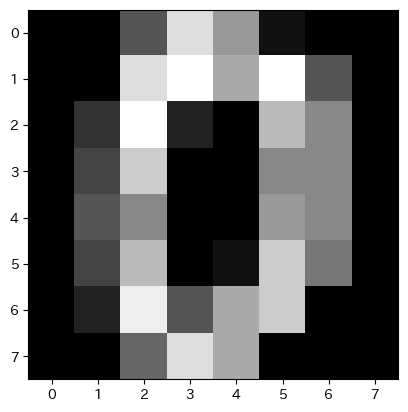

In [69]:
plt.imshow(data[0].reshape(8, 8), cmap='gray')

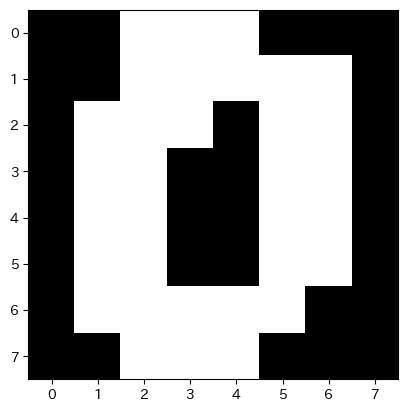

In [70]:
th, im_th_tz = cv2.threshold(data, 1, 255, cv2.THRESH_BINARY)
plt.imshow(im_th_tz[0].reshape(8, 8), cmap='gray')

前処理

In [71]:
th, im_th_tz = cv2.threshold(data, 1, 255, cv2.THRESH_BINARY) # 二値化1より大きい数は255とするそれ以外の値は0とする
normalize_data = im_th_tz / 255.0 # 正規化(0~1)
# X_TSNEprojected = PCA(n_components=2, random_state=0).fit_transform(normalize_data)
X_TSNEprojected = umap.UMAP(n_components=2, random_state=0).fit_transform(normalize_data)
# X_TSNEprojected = TSNE(n_components=2, random_state=0).fit_transform(normalize_data)
x1 = X_TSNEprojected[:, 0]
x2 = X_TSNEprojected[:, 1]

/home/shota/.pyenv/versions/3.10.11/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


グラフ描画

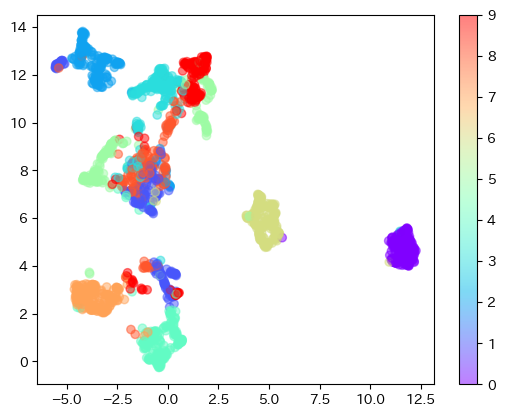

In [72]:
plt.scatter(x1, x2, c=label, alpha=0.5, cmap="rainbow")
plt.colorbar()

Accuracyの計算

In [73]:
dataset = x1.flatten()
th = 10
pred = np.array(list(map(lambda x: is_zero(th, x), dataset)))
label = np.array(list(map(lambda x: "zero" if x == 0 else "other", label)))

print(f"正解率: {accuracy_score(label, pred )*100}%")

正解率: 99.77740678909294%


Text(0.5, 1.0, '2D Histogram')

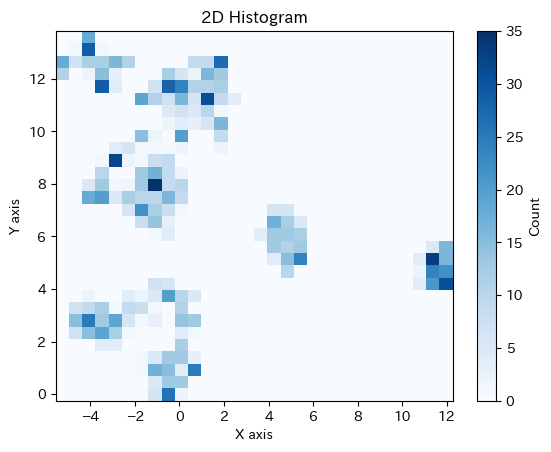

In [74]:
# ヒストグラムをプロット
plt.hist2d(X_TSNEprojected[:, 0], X_TSNEprojected[:, 1], bins=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('2D Histogram')

/tmp/ipykernel_6840/897602774.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=X_TSNEprojected[:, 0], y=X_TSNEprojected[:, 1], cmap="Blues", shade=True, bw_adjust=.5)


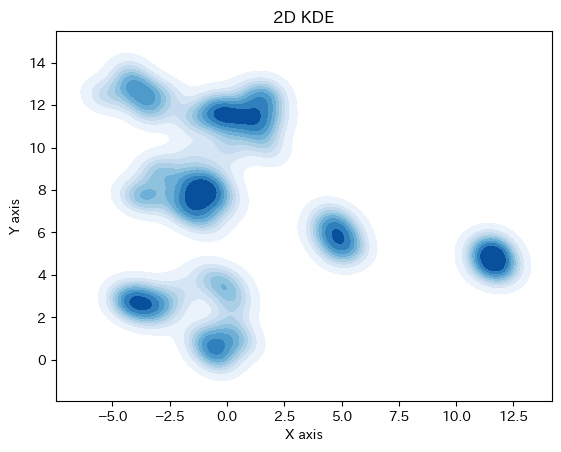

In [75]:
# カーネル密度推定をプロット
import seaborn as sns
sns.kdeplot(x=X_TSNEprojected[:, 0], y=X_TSNEprojected[:, 1], cmap="Blues", shade=True, bw_adjust=.5)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('2D KDE')
plt.show()